Sentimental analysis of Restaurant reviews (Binary +ve or -ve)

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
dataset = pd.read_csv(r"Restaurant_Reviews.tsv",delimiter = "\t",quoting=3)

#quoting = 0 - minimal quoting values
#          1 - all values
#          2 - non numerical values
#          3 - omit quotes while splitting


In [101]:
dataset.head(2)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0


In [102]:
dataset.tail(2)

,Review,Liked
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [103]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
dataset_list = []
for i in range(0,dataset.shape[0]):
    review = re.sub("[^a-zA-Z]"," ", dataset["Review"][i])
#except alphabets, replace/substitute everything with space
    review = review.lower().split() #convert all capital to small letters and convert sentence to list, delimiter = " "
    review = [ps.stem(word) for word in review if word not in set (stopwords.words("english"))]#remove stop words & stemming
    dataset_list.append(" ".join(review))#finally join every word in list and append it to a new list

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)#max_features is max number of words that are to be columns. To avoid sparcity(more number of zeros)

In [106]:
x = cv.fit_transform(dataset_list).toarray() #convert every word(as column) and update its frequency per sentence(as row) in dataset_list
#visualize x in variables to undertsand it or refer to bag of words(nlp pipeline) in 11_nlp.ipynb
y = dataset.iloc[:,-1].values#numpy array of last cloumn of dataset

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [108]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

In [109]:
model.add(Dense(input_dim=1500,kernel_initializer = "random_uniform",activation = "sigmoid",units=1000))
model.add(Dense(units=100,kernel_initializer = "random_uniform",activation = "sigmoid"))
model.add(Dense(units=1,kernel_initializer = "random_uniform",activation = "sigmoid"))

In [110]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [111]:
model.fit(x_train,y_train,batch_size=10,epochs=50)#more epochs can result in overfitting

Epoch 1/50
80/80 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.5013
Epoch 2/50
80/80 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5013
Epoch 3/50
80/80 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5650
Epoch 4/50
80/80 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7575
Epoch 5/50
80/80 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.8950
Epoch 6/50
80/80 [==============================] - 0s 3ms/step - loss: 0.1848 - accuracy: 0.9400
Epoch 7/50
80/80 [==============================] - 0s 3ms/step - loss: 0.1390 - accuracy: 0.9450
Epoch 8/50
80/80 [==============================] - 0s 3ms/step - loss: 0.0955 - accuracy: 0.9675
Epoch 9/50
80/80 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9775
Epoch 10/50
80/80 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9787
Epoch 11/50
80/80 [

In [112]:
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmn = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.725


<AxesSubplot:>

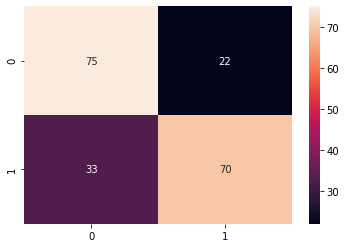

In [114]:
import seaborn as sns
sns.heatmap(cmn,annot=True)

In [115]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1000)              1501000   
_________________________________________________________________
dense_14 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 1,601,201
Trainable params: 1,601,201
Non-trainable params: 0
_________________________________________________________________
